<a href="https://colab.research.google.com/github/Yash0411/Machine-Learning-initial-projects/blob/master/Devnagri_Script_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [0]:
from google.colab import files
files.upload() #upload kaggle.json
 
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
kaggle.json


In [0]:
!kaggle datasets download -d somnath796/devnagri-handwritten-character

devnagri-handwritten-character.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip -q /content/devnagri-handwritten-character.zip -d .
!ls

replace ./DEVNAGARI_NEW/TEST/1/001_01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import os

training_dir = os.listdir('/content/DEVNAGARI_NEW/TRAIN/')
testing_dir = os.listdir('/content/DEVNAGARI_NEW/TEST/')

print(len(training_dir))
print(len(testing_dir))



48
48


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units = 48, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [6]:
TRAINING_DIR = "/content/DEVNAGARI_NEW/TRAIN"
train_datagen = ImageDataGenerator( rescale=1./255.)

training_set = train_datagen.flow_from_directory(TRAINING_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




VALIDATION_DIR = "/content/DEVNAGARI_NEW/TEST"
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

test_set = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


In [7]:
history = classifier.fit_generator(training_set,
                         epochs = 32,
                         validation_data = test_set)



Epoch 1/32
204/204 [==============================] - 5s 25ms/step - loss: 3.1872 - accuracy: 0.1702 - val_loss: 2.5264 - val_accuracy: 0.4460
Epoch 2/32
204/204 [==============================] - 3s 17ms/step - loss: 1.2663 - accuracy: 0.6186 - val_loss: 0.7619 - val_accuracy: 0.6643
Epoch 3/32
204/204 [==============================] - 3s 17ms/step - loss: 0.7419 - accuracy: 0.7672 - val_loss: 1.2451 - val_accuracy: 0.7307
Epoch 4/32
204/204 [==============================] - 3s 17ms/step - loss: 0.5220 - accuracy: 0.8346 - val_loss: 0.7959 - val_accuracy: 0.7509
Epoch 5/32
204/204 [==============================] - 3s 16ms/step - loss: 0.3843 - accuracy: 0.8753 - val_loss: 0.4314 - val_accuracy: 0.7533
Epoch 6/32
204/204 [==============================] - 3s 17ms/step - loss: 0.2809 - accuracy: 0.9082 - val_loss: 1.3176 - val_accuracy: 0.7409
Epoch 7/32
204/204 [==============================] - 3s 17ms/step - loss: 0.2199 - accuracy: 0.9248 - val_loss: 0.7845 - val_accuracy: 0.7557

Text(0.5, 1.0, 'Training and validation loss')

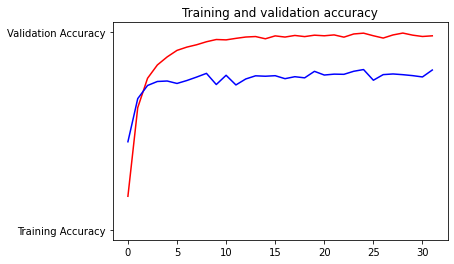

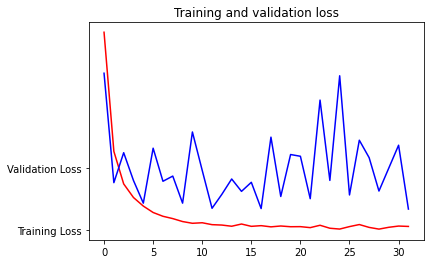

In [8]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
